In [1]:
#%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from matplotlib.animation import FuncAnimation
import numpy as np
import copy


In [2]:
def random_particules_v3(n):
    N=[]
    N.append(0)
    
    for i in range(n-1):
        i=i+1
        N.append(i)
    position={}
    typ= {}
    for i in range(n):
        x,y = np.random.random(),np.random.random()
        position[i]=(x,y)
        r=np.random.rand()
        if r<=0.25:
            typ[i] = 2
        elif r>0.25 and r<=0.50:
            typ[i] = 20
        elif r>0.50 and r<=0.75:
            typ[i] = 111
        else :
            typ[i] = 43
        
    return N,position,typ

In [3]:
def mult_tuple(a,b):
    return (a[0]*b[0],a[1]*b[1])

In [4]:
def sum_tuple(a,b):
    return (a[0]+b[0],a[1]+b[1])

In [5]:
def direction_v3(N,position,v):
    direction={}
    
    for i in range(len(N)):
        if np.random.rand()<0.25:
            direction[i]=(v,v)
            
        elif np.random.rand()<0.25:
            direction[i]=(-v,-v)
            
        elif np.random.rand()<0.25:
            direction[i]=(v,-v)
            
        else: 
            direction[i]=(-v,v)
        
        
        
    return direction

In [6]:
def update_particules_v3(N,position,direction):
    
    
    for i in N:
        position[i]= sum_tuple(position[i],direction[i])
        
    #REBOND    
    for i in N:
        (a,b)=position[i] 
        
        if a<= 0 and b<=0:
            a=0
            b=0
            position[i]=(a,b)
            direction[i]= mult_tuple(direction[i],(-1,-1))
            
        if a>= 1 and b>=1:
            a=1
            b=1
            position[i]=(a,b)
            direction[i]= mult_tuple(direction[i],(-1,-1))
            
        
        if a<= 0 and b>=1:
            b=1
            a=0
            position[i]=(a,b)
            direction[i]= mult_tuple(direction[i],(-1,-1))
            
            
        if b<= 0 and a>=1:
            a=1
            b=0
            position[i]=(a,b)
            direction[i]= mult_tuple(direction[i],(-1,-1))
            
            
        if a<= 0 and b>0 and b<1:
            a=0
            
            position[i]=(a,b)
            direction[i]= mult_tuple(direction[i],(-1,1))
        
        if a>= 1 and b>0 and b<1:
            a=1
            
            position[i]=(a,b)
            direction[i]= mult_tuple(direction[i],(-1,1))
            
        if b<= 0 and a>0 and a<1:
            b=0
            
            position[i]=(a,b)
            direction[i]= mult_tuple(direction[i],(1,-1))
        
        if b>= 1 and a>0 and a<1:
            b=1
            
            position[i]=(a,b)
            direction[i]= mult_tuple(direction[i],(1,-1))
             
    return N,position, direction

In [7]:
def fusion_v5(N,position,direction,typ):
    weight_set = set([4,63,40,60,24,83,65,22])
    for i in N:
        for e in N:
            if i!=e:
                (x0,y0)=position[i]
                (x1,y1)=position[e]
                if np.around(x0,1)==np.around(x1,1) and np.around(y0,1)==np.around(y1,1):
                    if typ[i]+typ[e] in weight_set:
                        typ[i]=typ[i]+typ[e]              
                    
                        del typ[e]
                        del position[e]
                        del direction[e]
                        del N[N.index(e)]                        
                            
    return N,position,direction,typ

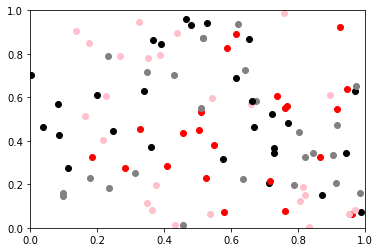

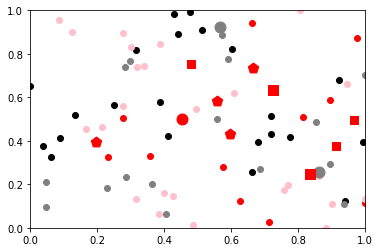

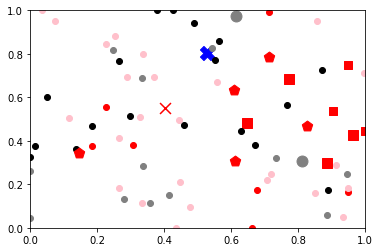

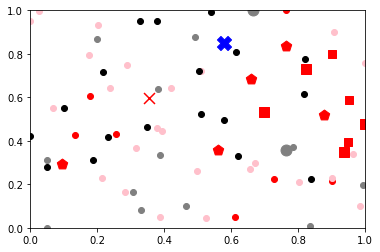

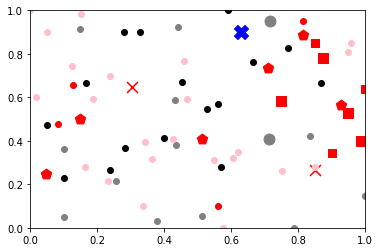

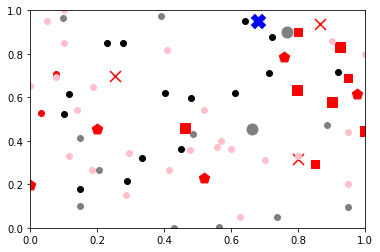

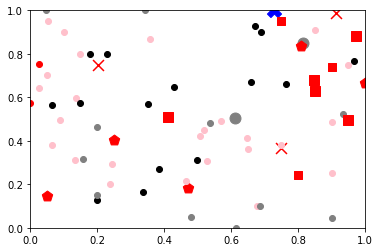

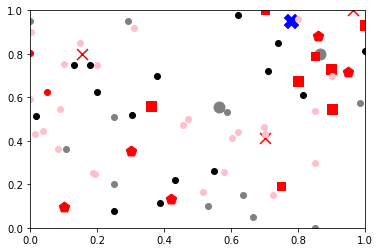

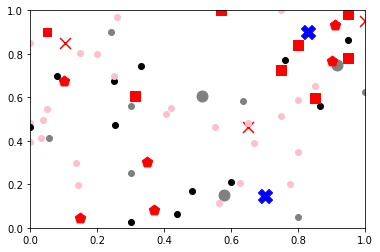

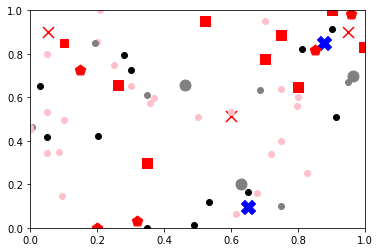

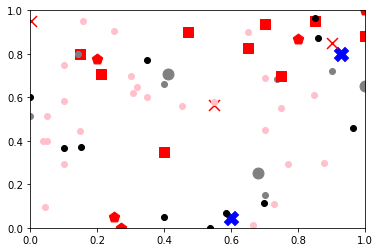

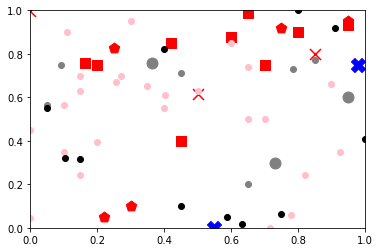

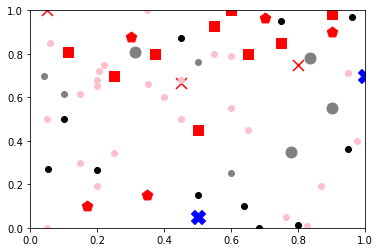

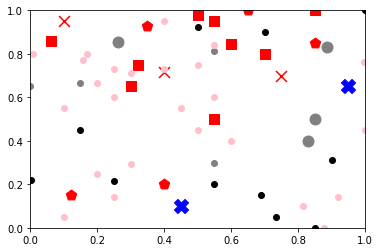

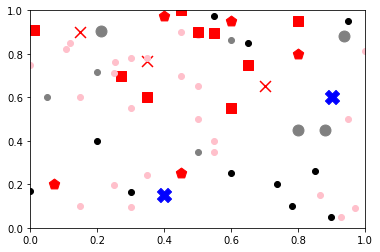

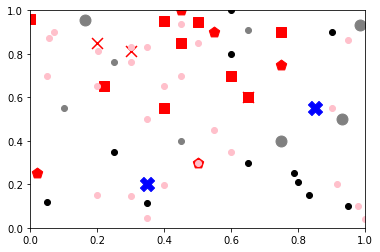

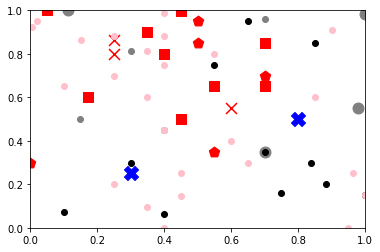

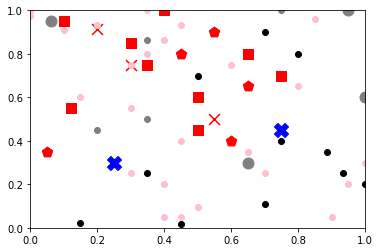

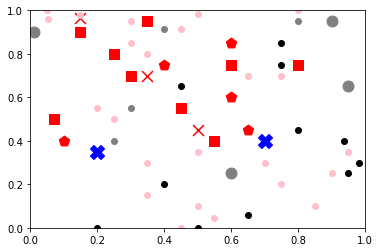

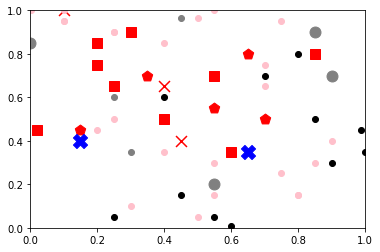

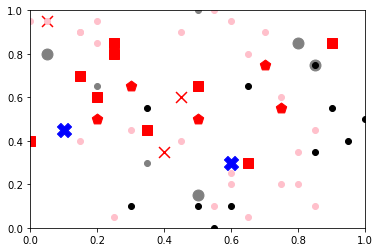

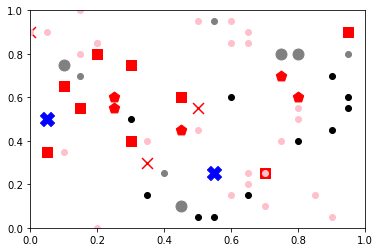

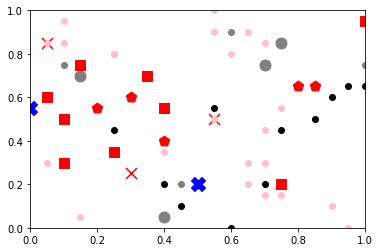

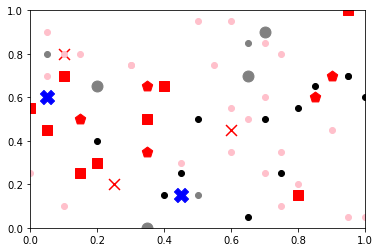

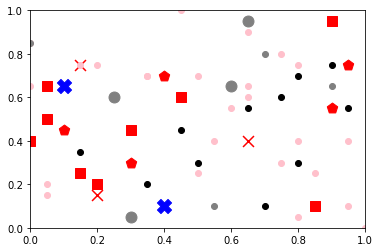

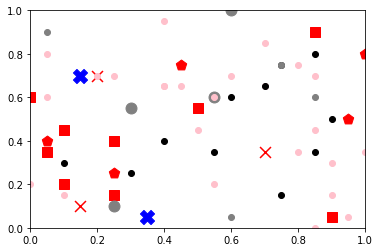

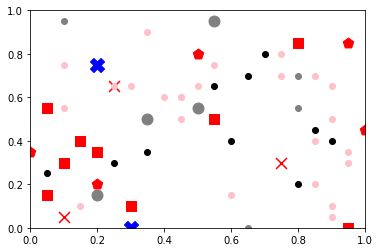

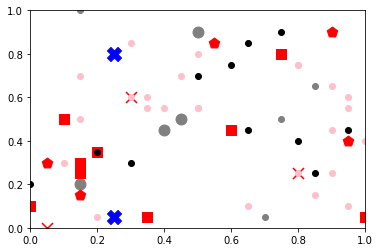

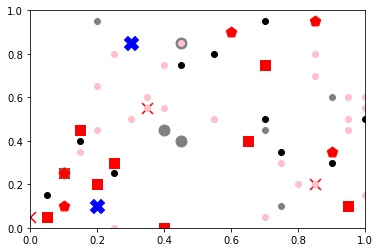

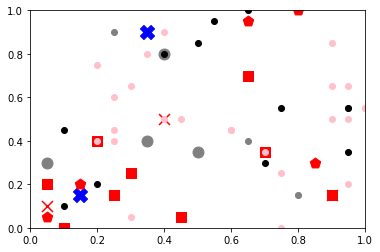

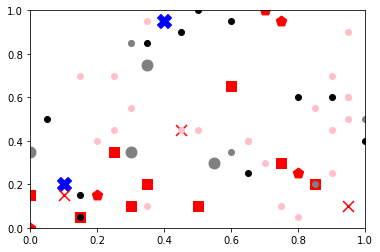

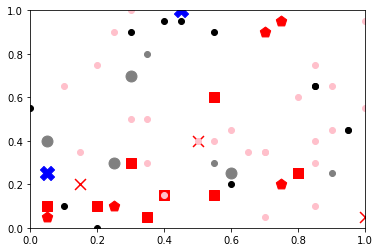

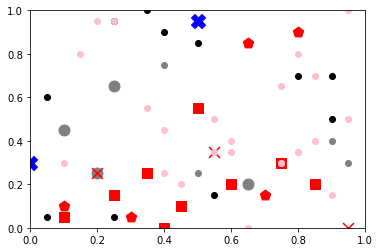

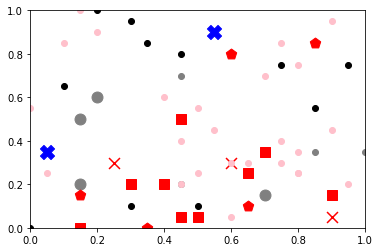

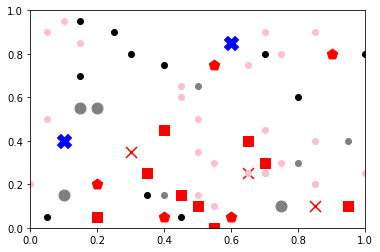

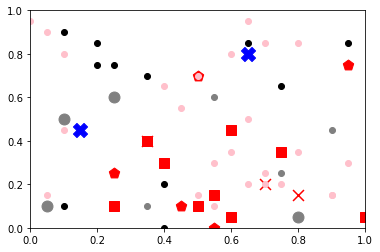

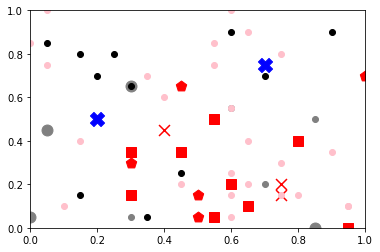

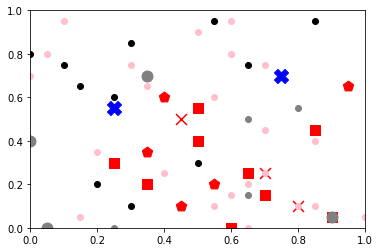

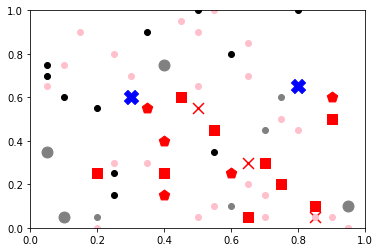

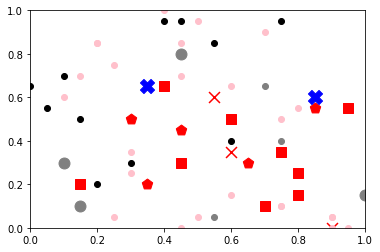

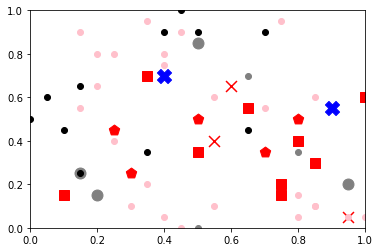

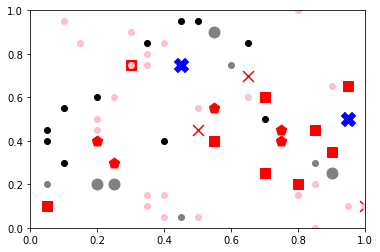

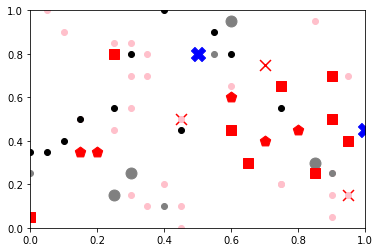

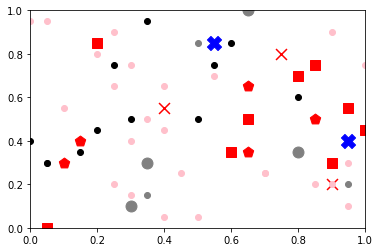

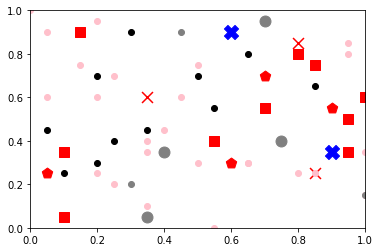

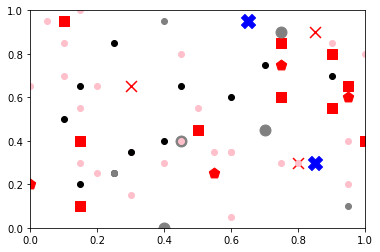

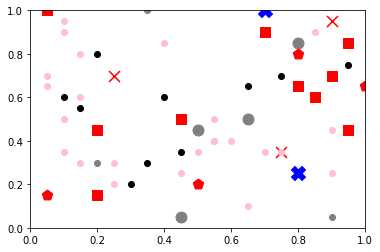

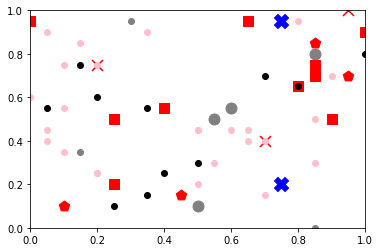

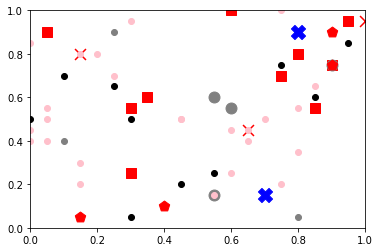

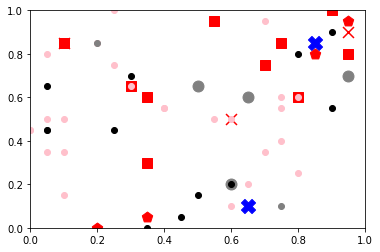

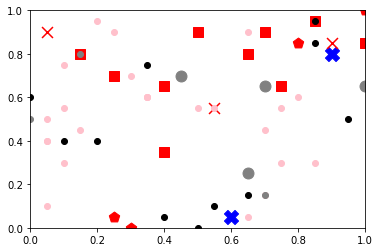

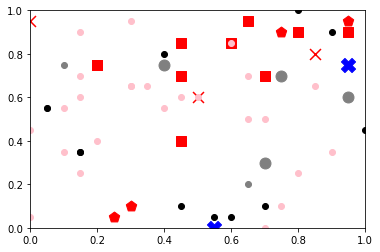

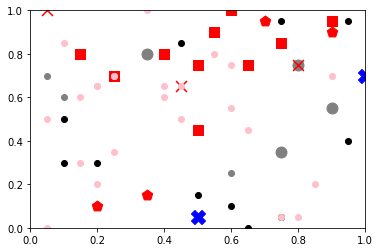

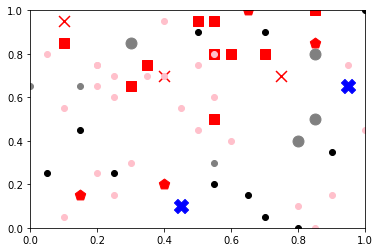

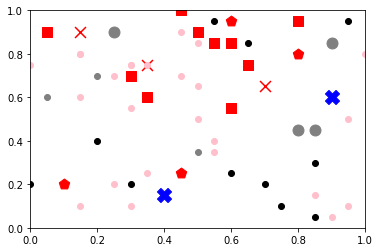

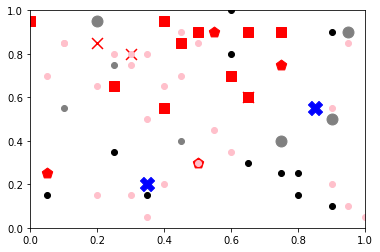

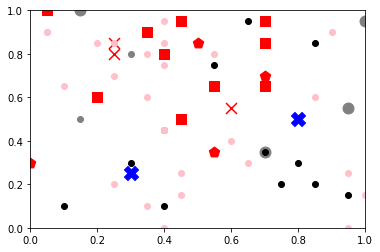

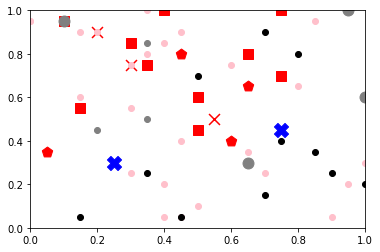

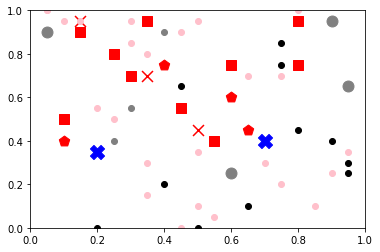

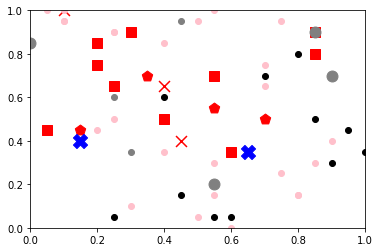

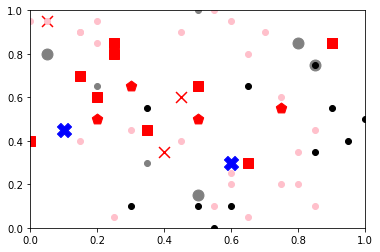

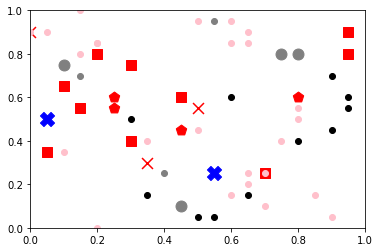

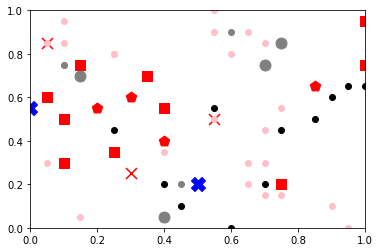

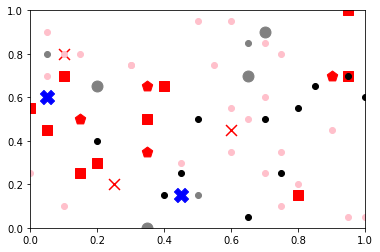

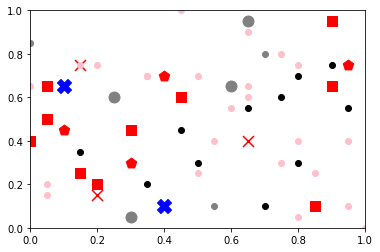

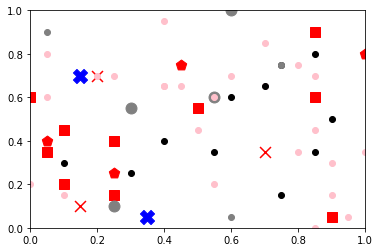

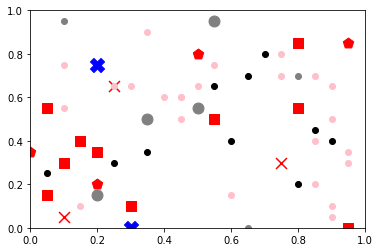

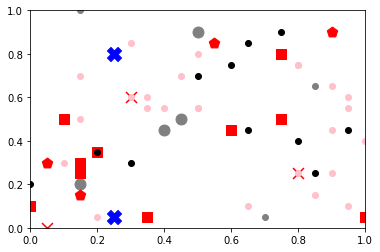

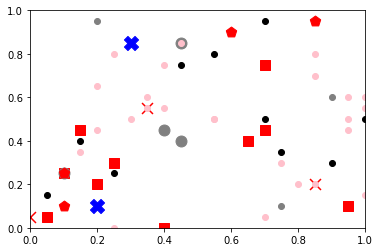

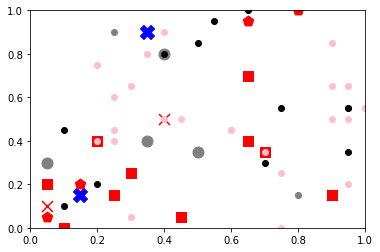

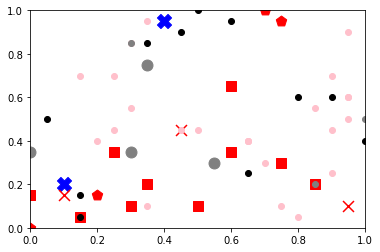

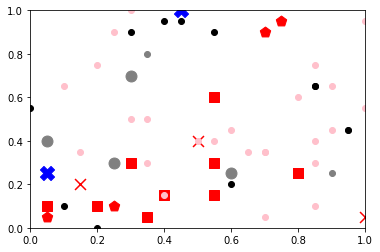

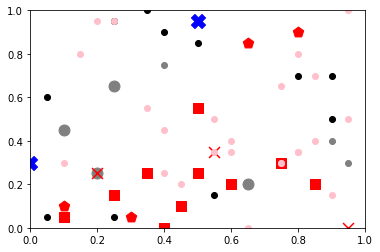

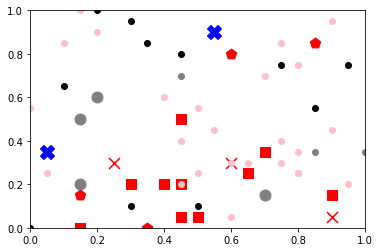

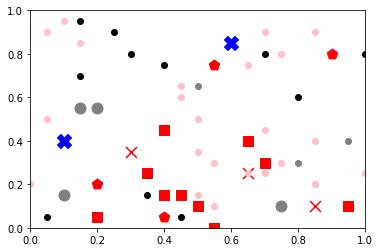

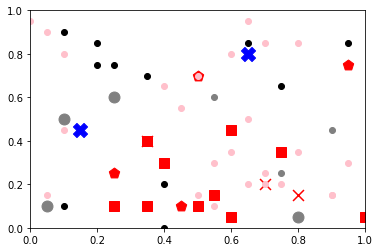

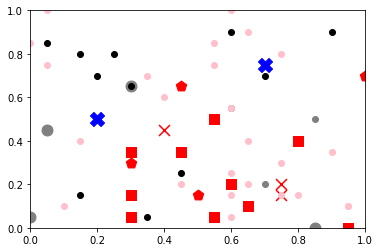

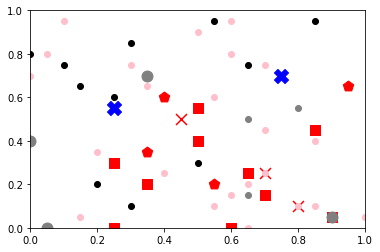

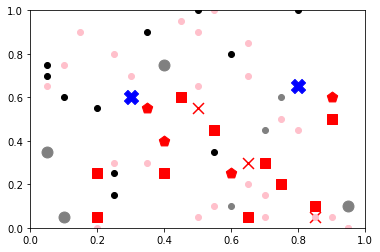

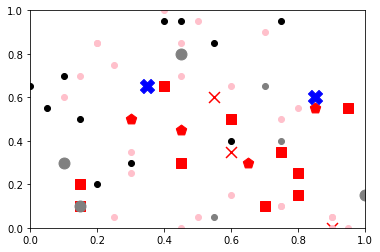

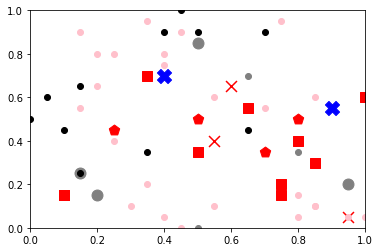

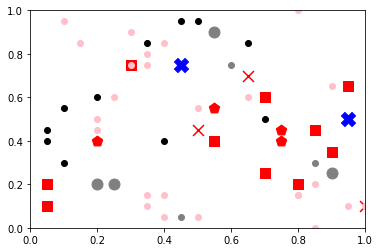

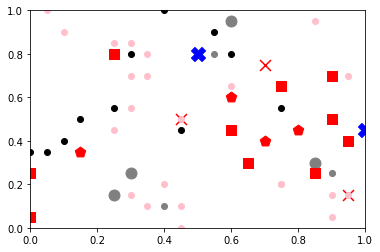

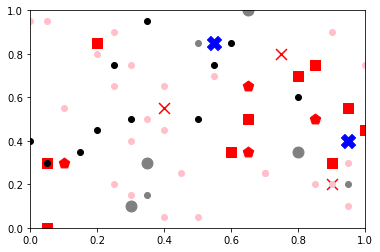

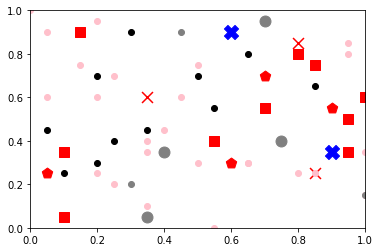

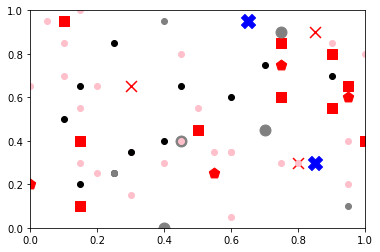

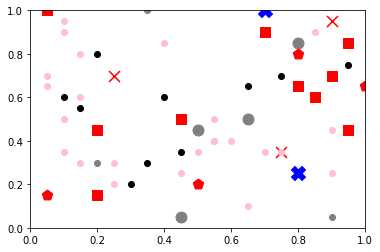

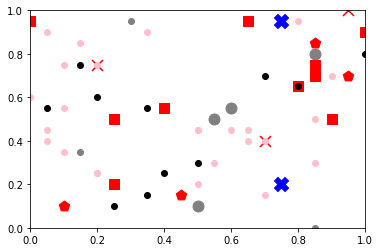

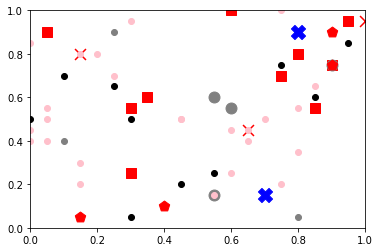

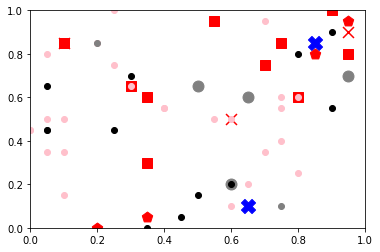

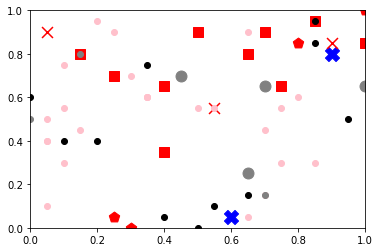

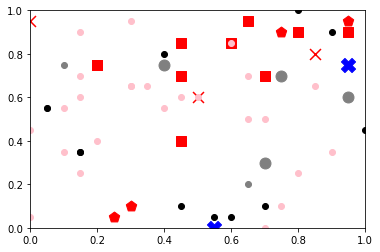

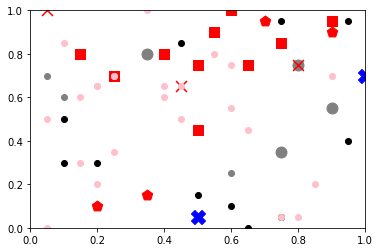

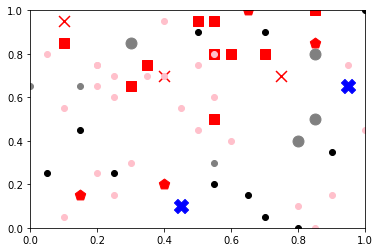

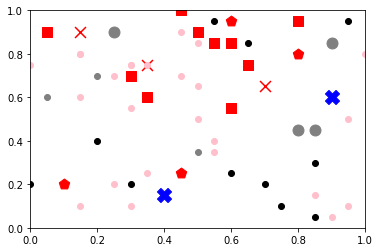

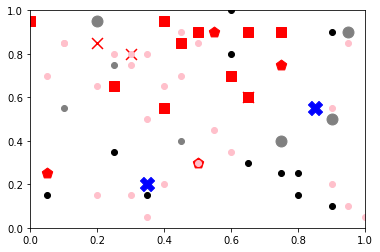

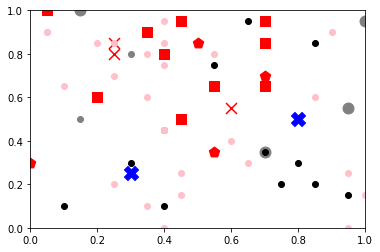

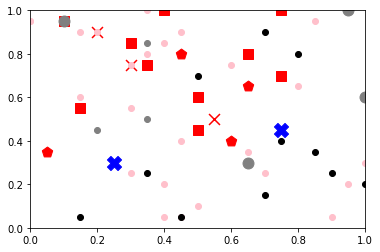

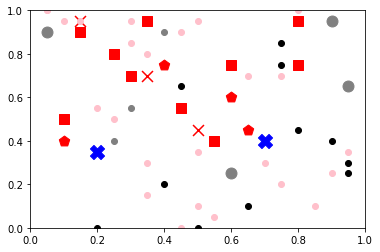

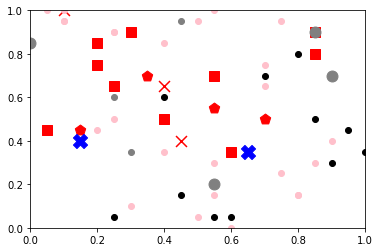

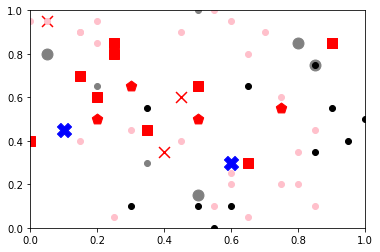

In [9]:
t=100
plt.figure()

plt.xlim(0, 1)
plt.ylim(0, 1)

N,position,typ = random_particules_v3(100)

for i in N:
    (a,b)=position[i]
    if typ[i]==2:  #H
        plt.scatter(a,b,c="gray")
    if typ[i]==111:  #H
        plt.scatter(a,b,c="pink")
    if typ[i]==20:  #O
        plt.scatter(a,b,c="red")
    if typ[i]==43:  #C
        plt.scatter(a,b,c="black")
#plt.savefig("0.png")
plt.show()
        
direction=direction_v3(N,position,0.05)

for i in range(t):
    N,position,direction=update_particules_v3(N,position,direction)
    N,position,direction,typ=fusion_v5(N,position,direction,typ) 
    
    for e in N:
        (a,b)=position[e]
        if typ[e]==2:   #H
            plt.scatter(a,b,c="gray")
        if typ[e]==20:  #O
            plt.scatter(a,b,c="red")
        if typ[e]==43:   #C
            plt.scatter(a,b,c="black")
        if typ[e]==111:  #H
            plt.scatter(a,b,c="pink")
            
        if typ[e]==4:   #H2
            plt.scatter(a,b,c="gray",s=120)
        if typ[e]==22:  #OH
            plt.scatter(a,b,c="red",s=60,marker='s')
        if typ[e]==65:  #COH
            plt.scatter(a,b,c="red",s=120,marker='s')
            
        if typ[e]==40:   #O2
            plt.scatter(a,b,c="red",s=120)
        if typ[e]==60:   #O3
            plt.scatter(a,b,c="red",s=240)
        if typ[e]==63:  #CO
            plt.scatter(a,b,c="red",s=120,marker='p')
        if typ[e]==83:  #CO2
            plt.scatter(a,b,c="red",s=120,marker='x')
        if typ[e]==24:   #H2O
            plt.scatter(a,b,c="blue",s=200,marker='X')
        

        
    plt.xlim(0, 1)
    plt.ylim(0, 1)    
    #plt.savefig(str(i+1)+".png")
    plt.show()

In [8]:
def random_particules_v4(n):
    N=[]
    N.append(0)
    
    for i in range(n-1):
        i=i+1
        N.append(i)
    position={}
    typ= {}
    for i in range(n):
        x,y = np.random.random(),np.random.random()
        position[i]=(x,y)
        
        r=np.random.rand()
        if r<=0.75:
            typ[i] = 2
        elif r>0.75 and r<=0.98:
            typ[i] = 111
        elif r>0.980 and r<=0.995:
            typ[i] = 20
        else :
            typ[i] = 43
        
    return N,position,typ

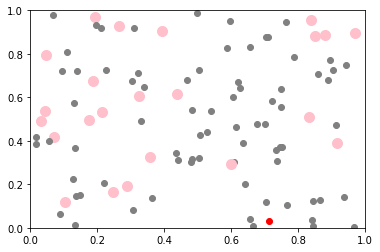

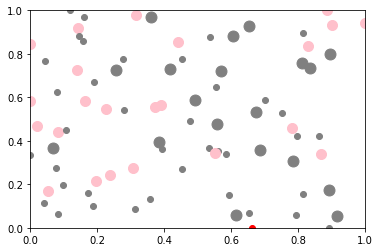

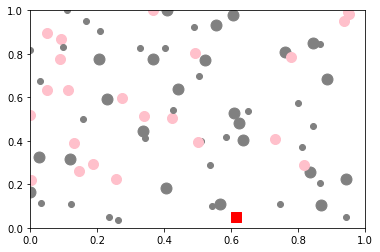

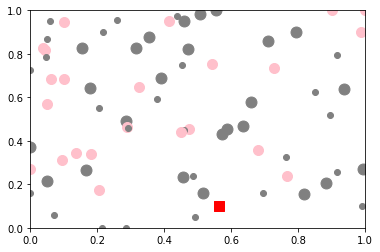

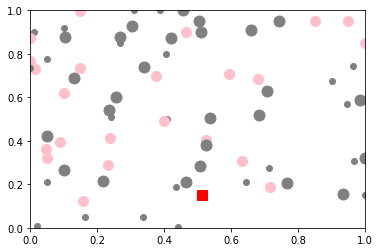

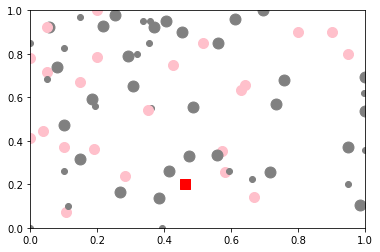

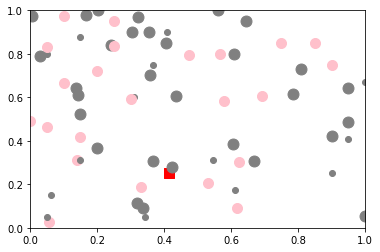

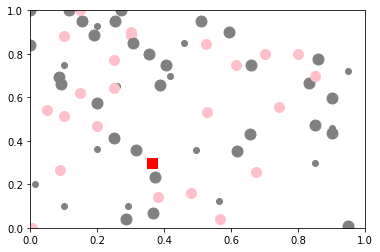

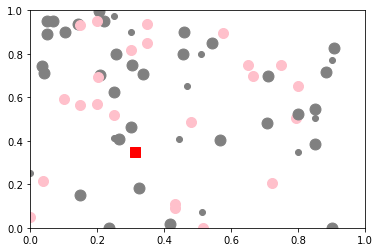

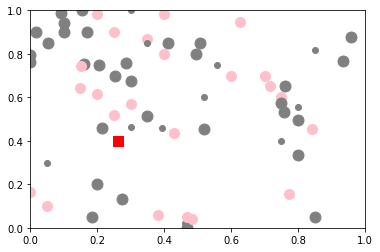

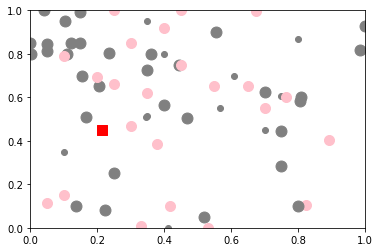

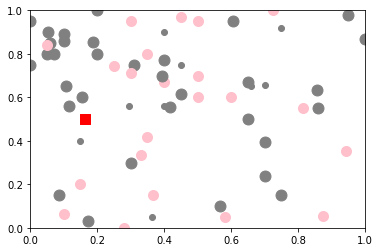

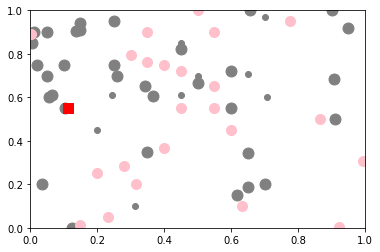

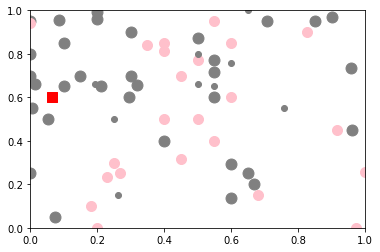

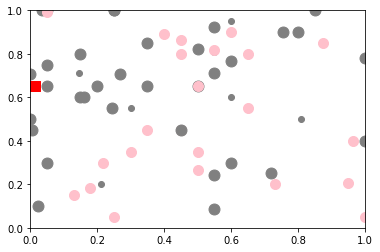

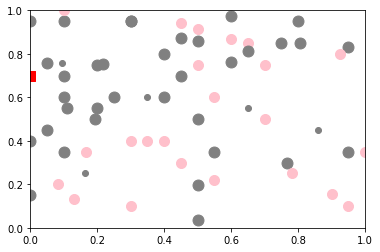

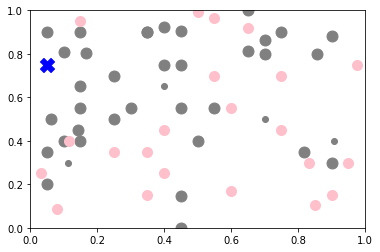

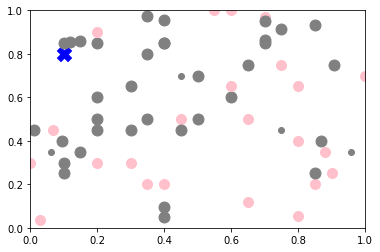

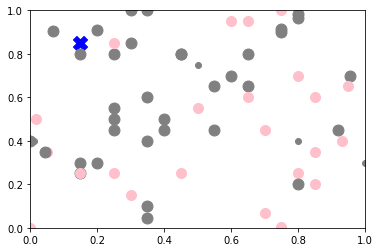

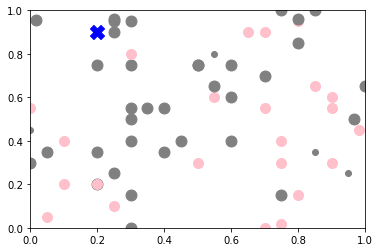

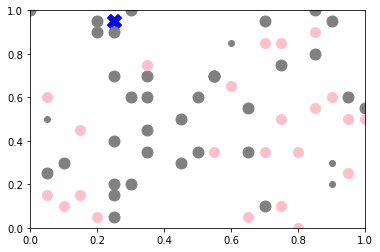

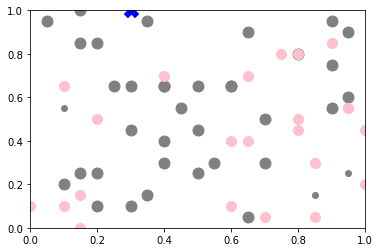

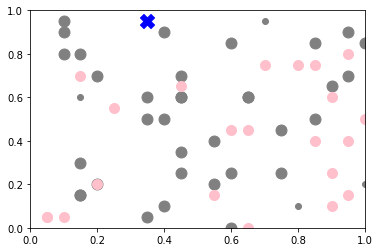

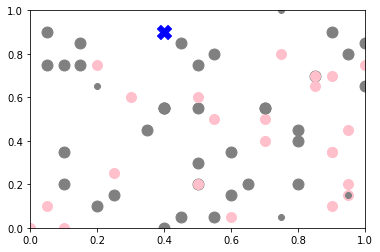

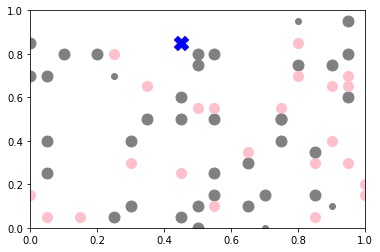

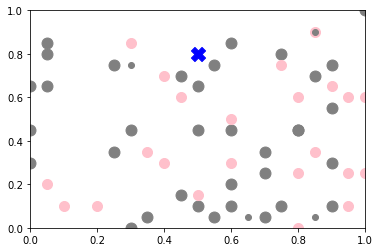

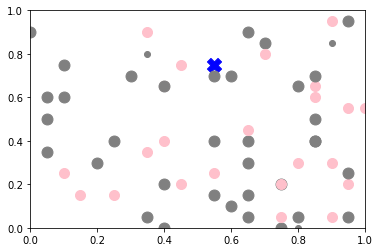

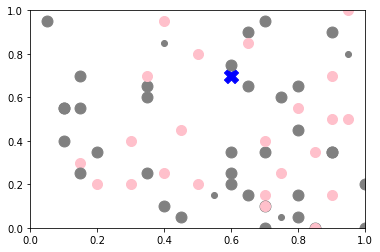

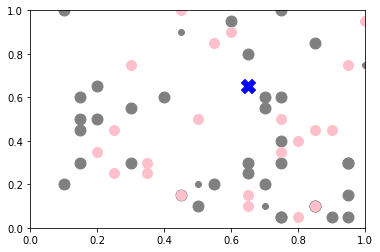

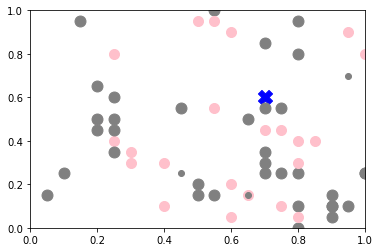

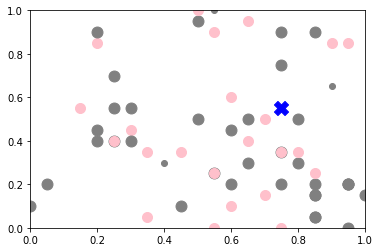

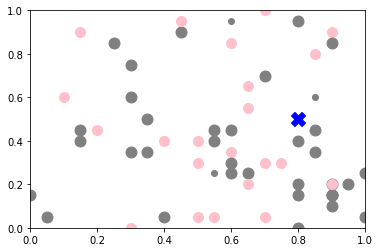

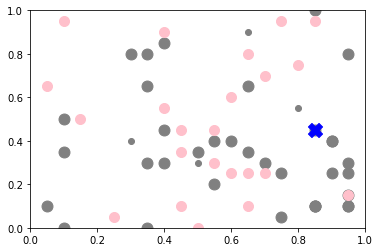

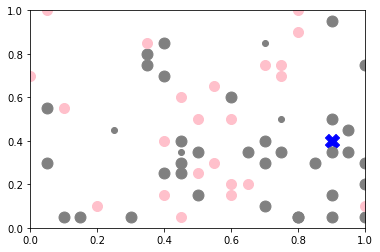

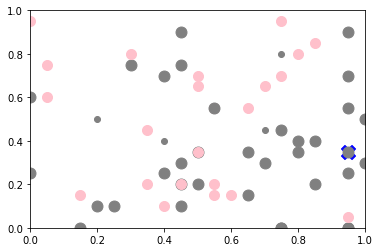

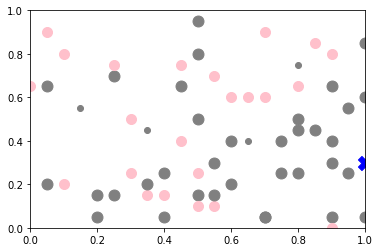

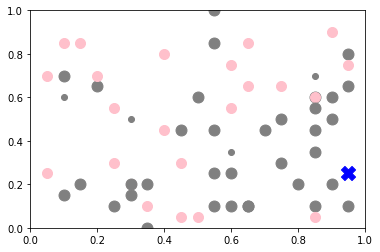

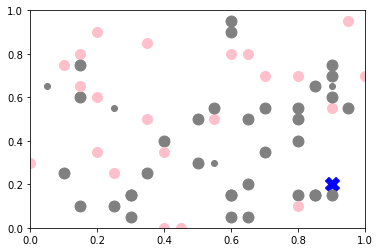

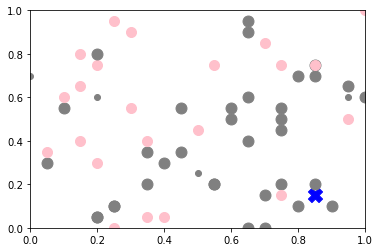

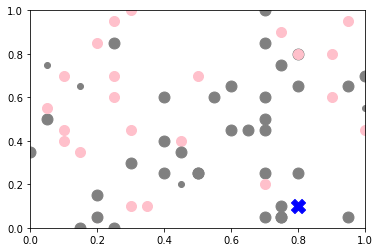

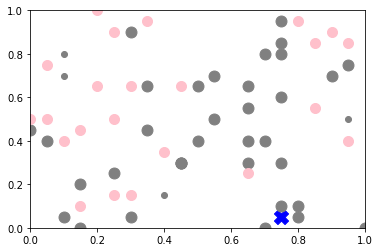

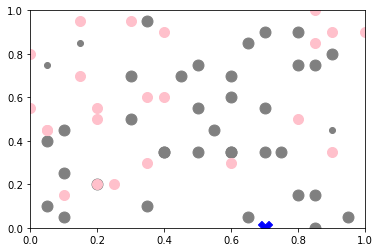

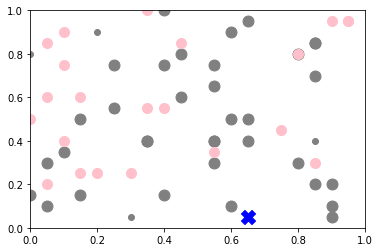

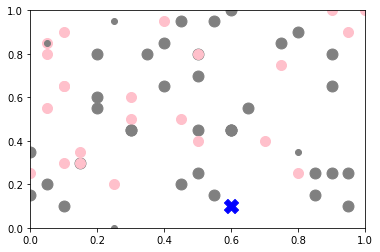

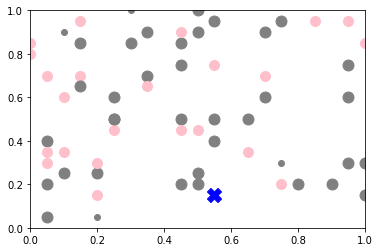

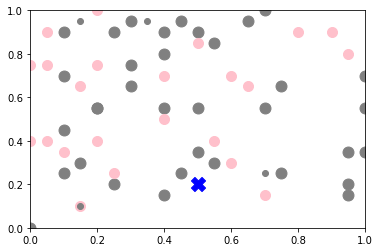

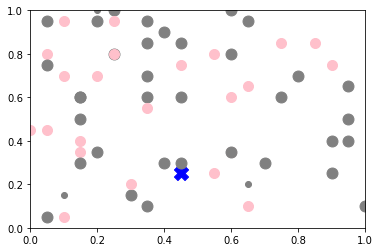

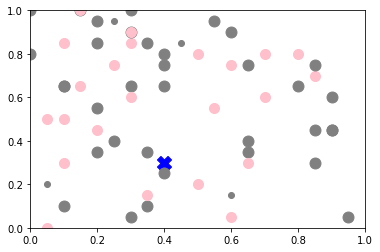

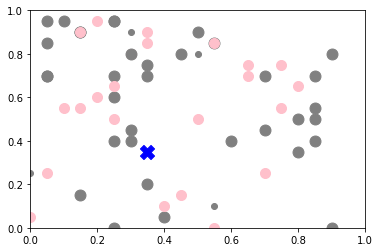

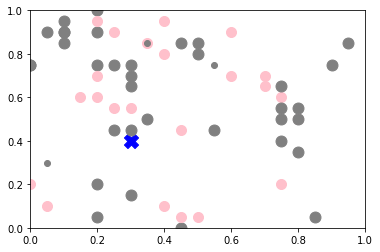

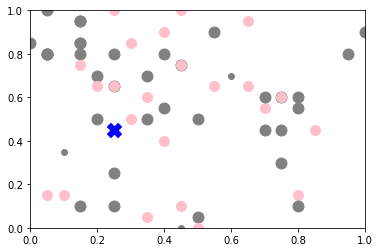

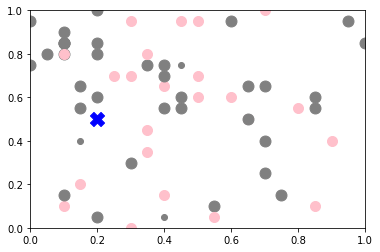

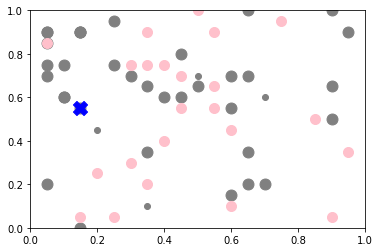

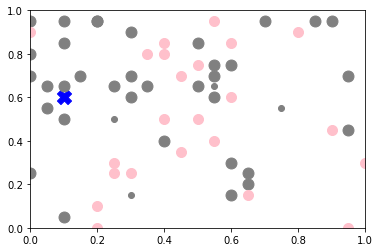

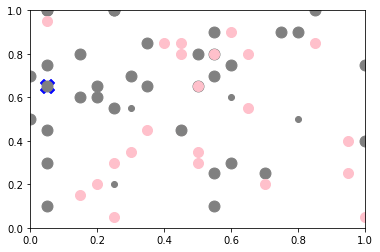

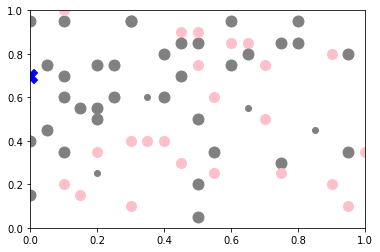

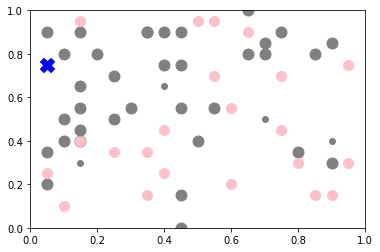

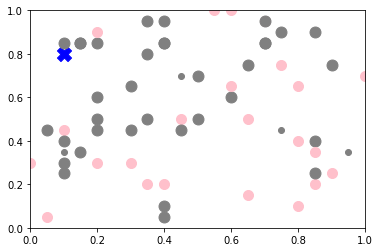

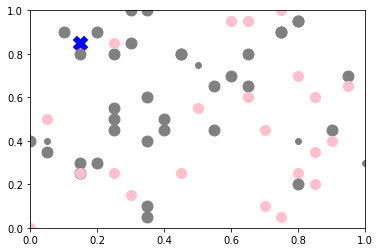

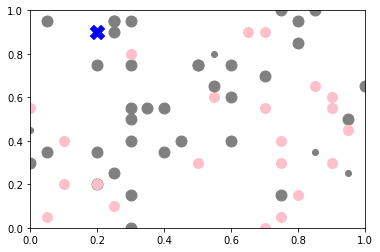

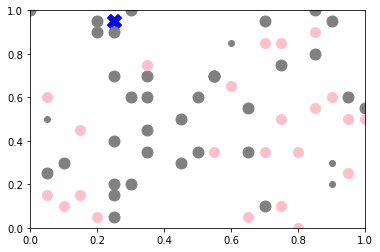

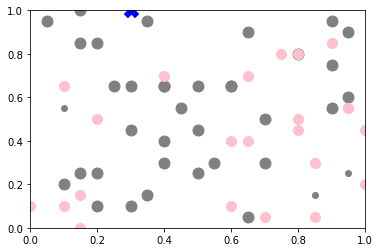

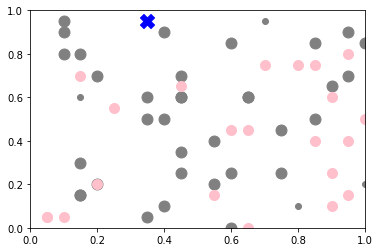

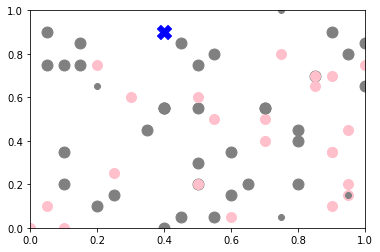

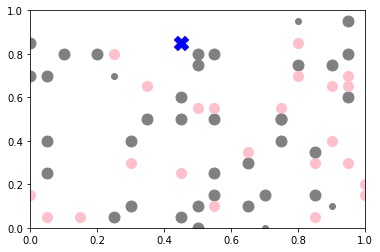

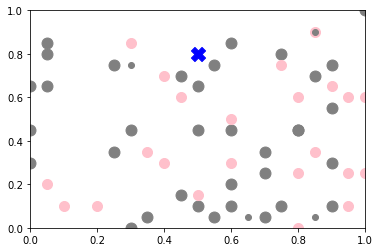

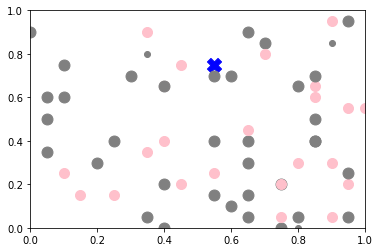

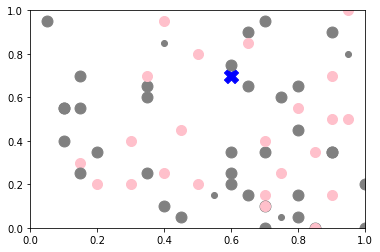

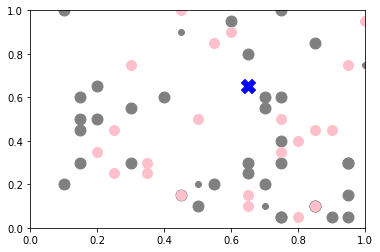

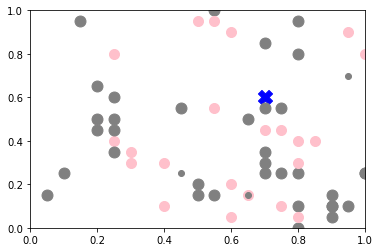

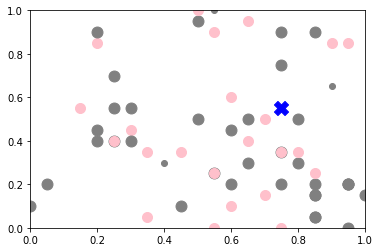

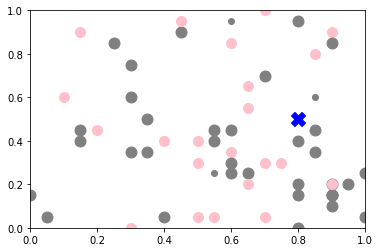

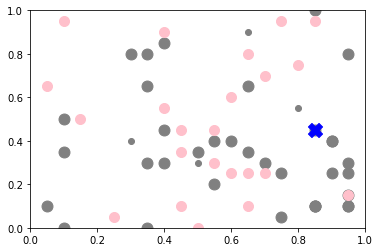

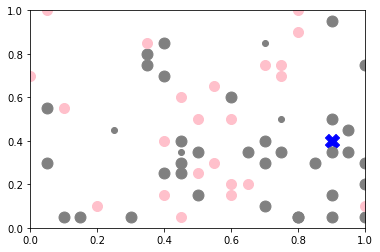

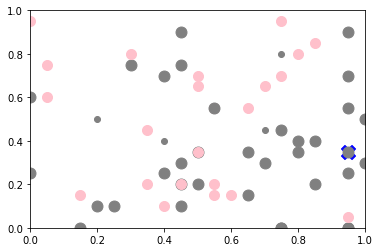

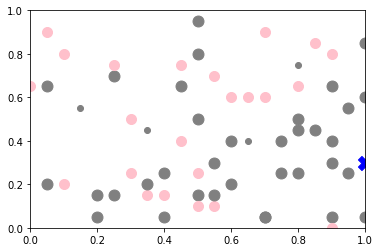

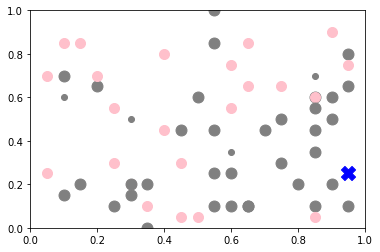

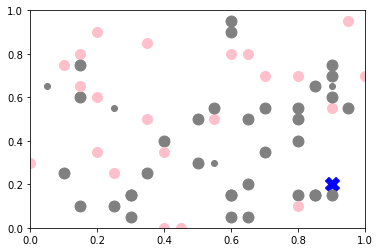

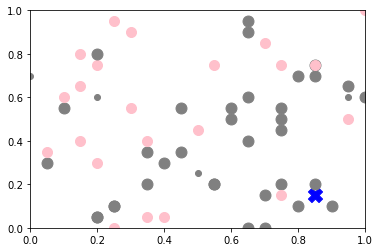

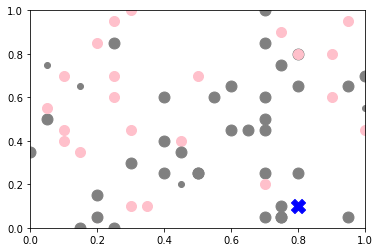

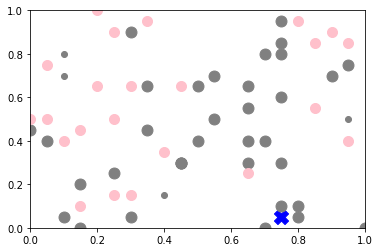

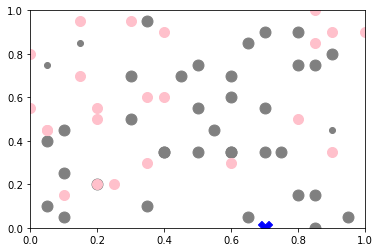

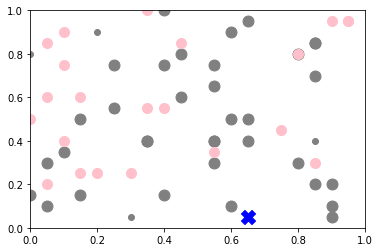

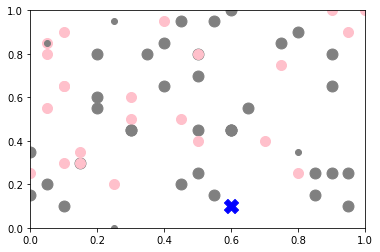

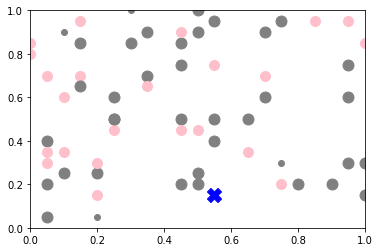

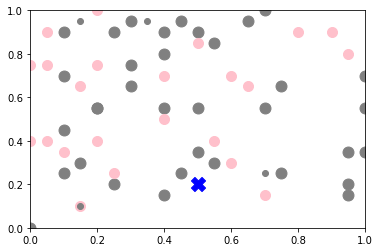

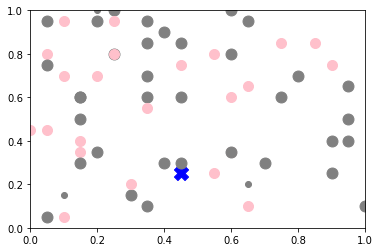

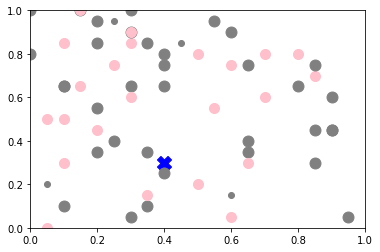

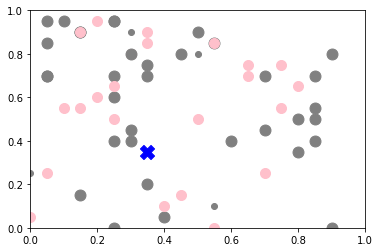

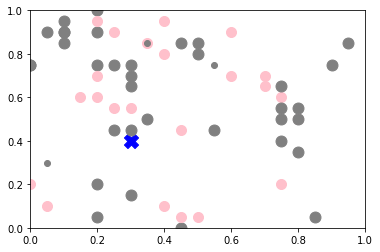

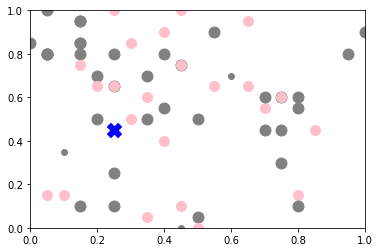

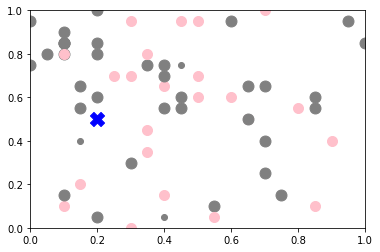

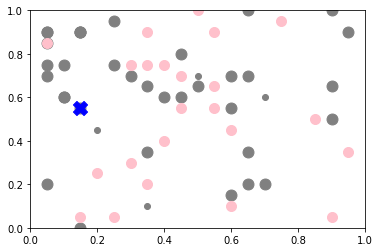

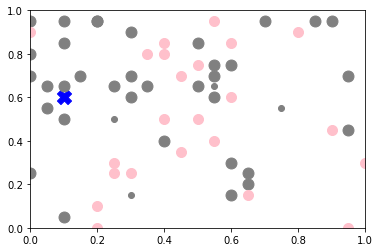

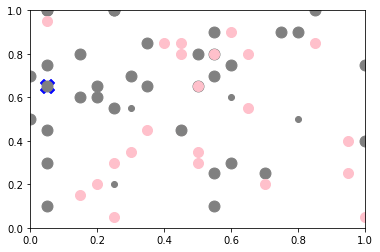

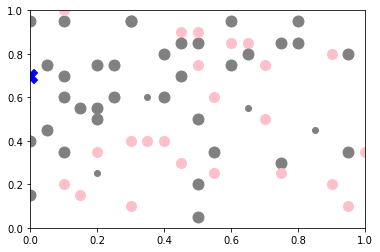

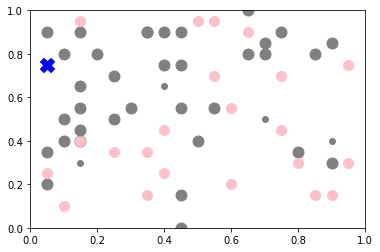

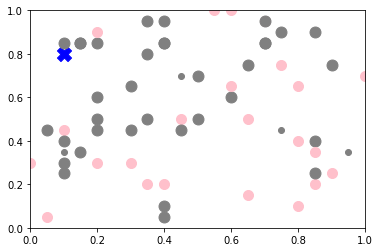

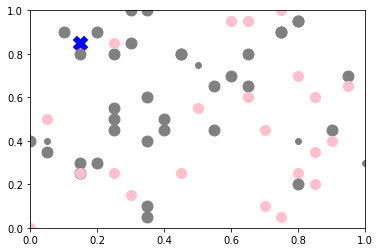

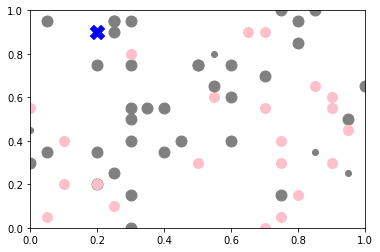

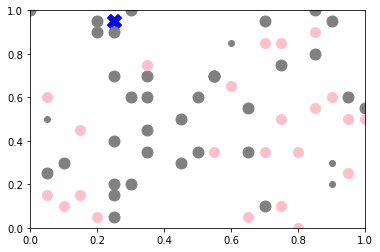

In [11]:
t=100
plt.figure()

plt.xlim(0, 1)
plt.ylim(0, 1)

N,position,typ = random_particules_v4(100)

for i in N:
    (a,b)=position[i]
    if typ[i]==2:  #H
        plt.scatter(a,b,c="gray")
    if typ[i]==20:  #O
        plt.scatter(a,b,c="red")
    if typ[i]==43:  #C
        plt.scatter(a,b,c="black")
    if typ[i]==111:  #He
        plt.scatter(a,b,c="pink",s=100)
#plt.savefig("0.png")
plt.show()
        
direction=direction_v3(N,position,0.05)

for i in range(t):
    N,position,direction=update_particules_v3(N,position,direction)
    N,position,direction,typ=fusion_v5(N,position,direction,typ) 
    
    for e in N:
        (a,b)=position[e]
        if typ[e]==2:   #H
            plt.scatter(a,b,c="gray")
        if typ[e]==111:   #He
            plt.scatter(a,b,c="pink",s=100)
        if typ[e]==20:  #O
            plt.scatter(a,b,c="red")
        if typ[e]==43:   #C
            plt.scatter(a,b,c="black")
            
        if typ[e]==4:   #H2
            plt.scatter(a,b,c="gray",s=120)
        if typ[e]==22:  #OH
            plt.scatter(a,b,c="red",s=120,marker='s')
        if typ[e]==65:  #COH
            plt.scatter(a,b,c="red",s=300,marker='s')
            
        if typ[e]==40:   #O2
            plt.scatter(a,b,c="red",s=120)
        if typ[e]==60:   #O3
            plt.scatter(a,b,c="red",s=240)
        if typ[e]==63:  #CO
            plt.scatter(a,b,c="red",s=120,marker='p')
        if typ[e]==83:  #CO2
            plt.scatter(a,b,c="red",s=240,marker='p')
        if typ[e]==24:   #H2O
            plt.scatter(a,b,c="blue",s=200,marker='X')
        

        
    plt.xlim(0, 1)
    plt.ylim(0, 1)    
    #plt.savefig(str(i+1)+".png")
    plt.show()

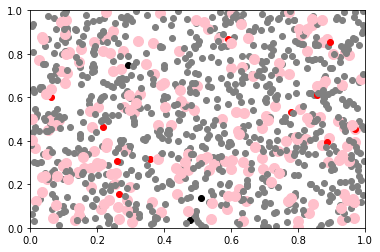

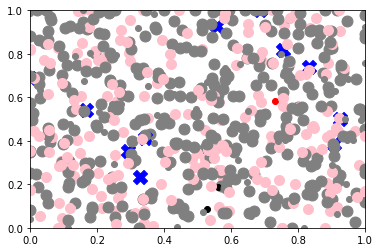

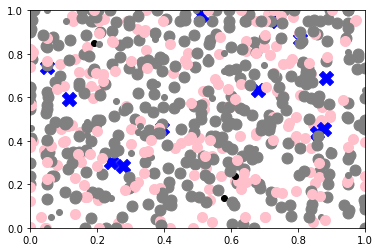

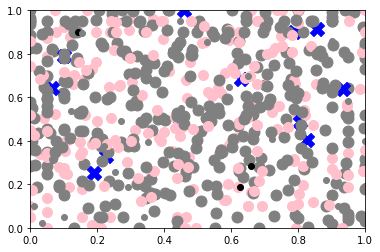

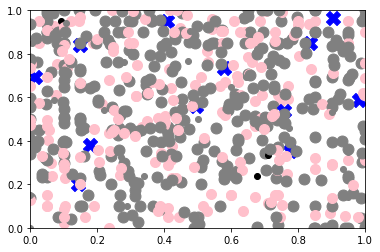

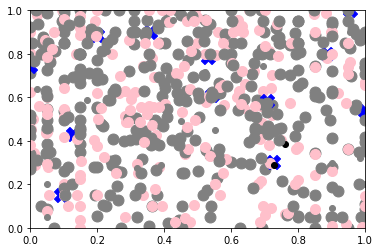

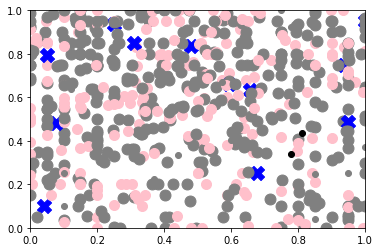

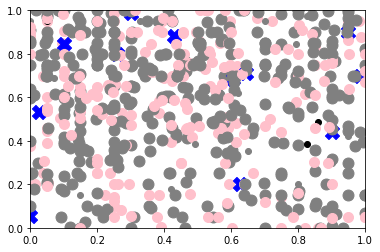

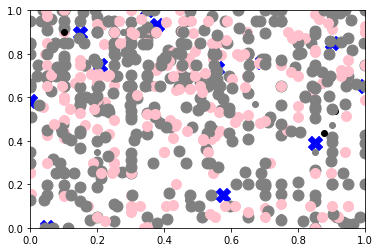

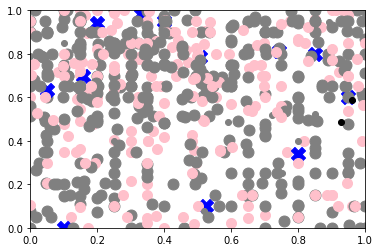

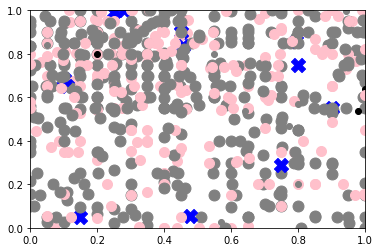

In [12]:
t=10
plt.figure()

plt.xlim(0, 1)
plt.ylim(0, 1)

N,position,typ = random_particules_v4(1000)

for i in N:
    (a,b)=position[i]
    if typ[i]==2:  #H
        plt.scatter(a,b,c="gray")
    if typ[i]==20:  #O
        plt.scatter(a,b,c="red")
    if typ[i]==43:  #C
        plt.scatter(a,b,c="black")
    if typ[i]==111:  #He
        plt.scatter(a,b,c="pink",s=100)
#plt.savefig("0.png")
plt.show()
        
direction=direction_v3(N,position,0.05)

for i in range(t):
    N,position,direction=update_particules_v3(N,position,direction)
    N,position,direction,typ=fusion_v5(N,position,direction,typ) 
    
    for e in N:
        (a,b)=position[e]
        if typ[e]==2:   #H
            plt.scatter(a,b,c="gray")
        if typ[e]==111:   #He
            plt.scatter(a,b,c="pink",s=100)
        if typ[e]==20:  #O
            plt.scatter(a,b,c="red")
        if typ[e]==43:   #C
            plt.scatter(a,b,c="black")
            
        if typ[e]==4:   #H2
            plt.scatter(a,b,c="gray",s=120)
        if typ[e]==22:  #OH
            plt.scatter(a,b,c="red",s=120,marker='s')
        if typ[e]==65:  #COH
            plt.scatter(a,b,c="red",s=300,marker='s')
            
        if typ[e]==40:   #O2
            plt.scatter(a,b,c="red",s=120)
        if typ[e]==60:   #O3
            plt.scatter(a,b,c="red",s=240)
        if typ[e]==63:  #CO
            plt.scatter(a,b,c="red",s=120,marker='p')
        if typ[e]==83:  #CO2
            plt.scatter(a,b,c="red",s=240,marker='p')
        if typ[e]==24:   #H2O
            plt.scatter(a,b,c="blue",s=200,marker='X')
        

        
    plt.xlim(0, 1)
    plt.ylim(0, 1)    
    #plt.savefig(str(i+1)+".png")
    plt.show()

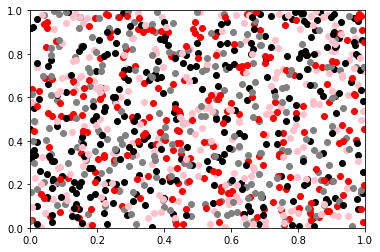

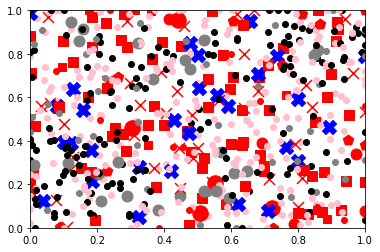

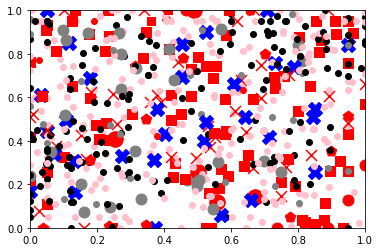

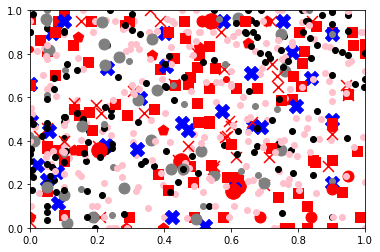

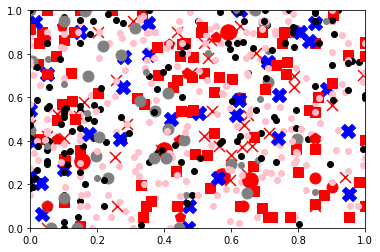

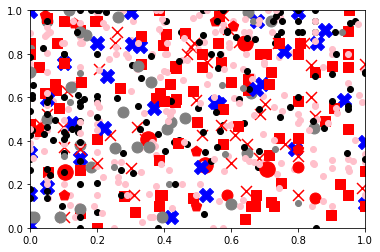

In [13]:
t=5
plt.figure()

plt.xlim(0, 1)
plt.ylim(0, 1)

N,position,typ = random_particules_v3(1000)

for i in N:
    (a,b)=position[i]
    if typ[i]==2:  #H
        plt.scatter(a,b,c="gray")
    if typ[i]==111:  #H
        plt.scatter(a,b,c="pink")
    if typ[i]==20:  #O
        plt.scatter(a,b,c="red")
    if typ[i]==43:  #C
        plt.scatter(a,b,c="black")
#plt.savefig("0.png")
plt.show()
        
direction=direction_v3(N,position,0.05)

for i in range(t):
    N,position,direction=update_particules_v3(N,position,direction)
    N,position,direction,typ=fusion_v5(N,position,direction,typ) 
    
    for e in N:
        (a,b)=position[e]
        if typ[e]==2:   #H
            plt.scatter(a,b,c="gray")
        if typ[e]==20:  #O
            plt.scatter(a,b,c="red")
        if typ[e]==43:   #C
            plt.scatter(a,b,c="black")
        if typ[e]==111:  #H
            plt.scatter(a,b,c="pink")
            
        if typ[e]==4:   #H2
            plt.scatter(a,b,c="gray",s=120)
        if typ[e]==22:  #OH
            plt.scatter(a,b,c="red",s=60,marker='s')
        if typ[e]==65:  #COH
            plt.scatter(a,b,c="red",s=120,marker='s')
            
        if typ[e]==40:   #O2
            plt.scatter(a,b,c="red",s=120)
        if typ[e]==60:   #O3
            plt.scatter(a,b,c="red",s=240)
        if typ[e]==63:  #CO
            plt.scatter(a,b,c="red",s=120,marker='p')
        if typ[e]==83:  #CO2
            plt.scatter(a,b,c="red",s=120,marker='x')
        if typ[e]==24:   #H2O
            plt.scatter(a,b,c="blue",s=200,marker='X')
        

        
    plt.xlim(0, 1)
    plt.ylim(0, 1)    
    #plt.savefig(str(i+1)+".png")
    plt.show()

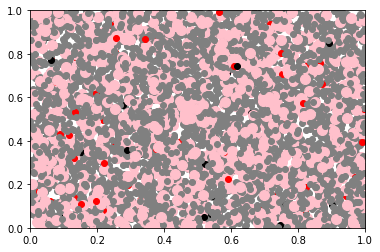

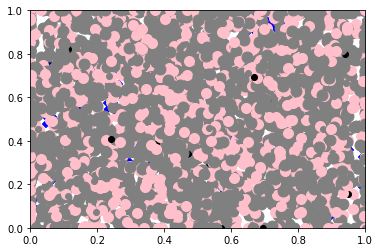

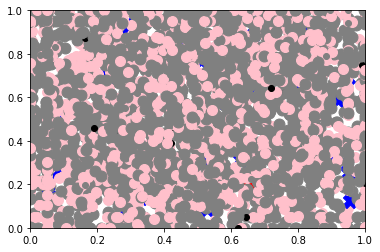

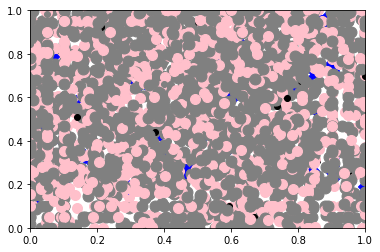

In [9]:
t=3
plt.figure()

plt.xlim(0, 1)
plt.ylim(0, 1)

N,position,typ = random_particules_v4(5000)

for i in N:
    (a,b)=position[i]
    if typ[i]==2:  #H
        plt.scatter(a,b,c="gray")
    if typ[i]==20:  #O
        plt.scatter(a,b,c="red")
    if typ[i]==43:  #C
        plt.scatter(a,b,c="black")
    if typ[i]==111:  #He
        plt.scatter(a,b,c="pink",s=100)
#plt.savefig("0.png")
plt.show()
        
direction=direction_v3(N,position,0.05)

for i in range(t):
    N,position,direction=update_particules_v3(N,position,direction)
    N,position,direction,typ=fusion_v5(N,position,direction,typ) 
    
    for e in N:
        (a,b)=position[e]
        if typ[e]==2:   #H
            plt.scatter(a,b,c="gray")
        if typ[e]==111:   #He
            plt.scatter(a,b,c="pink",s=100)
        if typ[e]==20:  #O
            plt.scatter(a,b,c="red")
        if typ[e]==43:   #C
            plt.scatter(a,b,c="black")
            
        if typ[e]==4:   #H2
            plt.scatter(a,b,c="gray",s=120)
        if typ[e]==22:  #OH
            plt.scatter(a,b,c="red",s=120,marker='s')
        if typ[e]==65:  #COH
            plt.scatter(a,b,c="red",s=300,marker='s')
            
        if typ[e]==40:   #O2
            plt.scatter(a,b,c="red",s=120)
        if typ[e]==60:   #O3
            plt.scatter(a,b,c="red",s=240)
        if typ[e]==63:  #CO
            plt.scatter(a,b,c="red",s=120,marker='p')
        if typ[e]==83:  #CO2
            plt.scatter(a,b,c="red",s=240,marker='p')
        if typ[e]==24:   #H2O
            plt.scatter(a,b,c="blue",s=200,marker='X')
        

        
    plt.xlim(0, 1)
    plt.ylim(0, 1)    
    #plt.savefig(str(i+1)+".png")
    plt.show()